In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose


Airlines Passengers Forecasting

In [2]:
file_path = 'data/Airlines+Data.xlsx'
sheet_name = 'Sheet1'
airlines_df = pd.read_excel(file_path, sheet_name=sheet_name)

In [3]:
airlines_df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


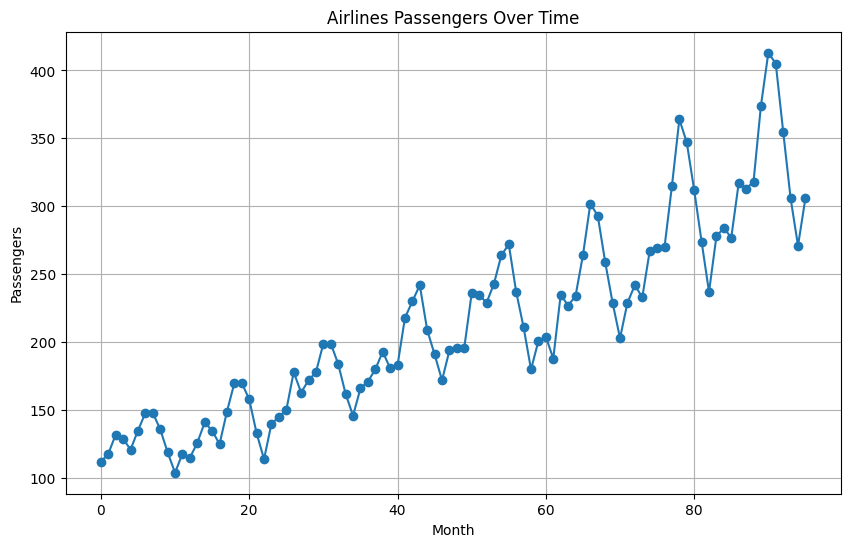

In [4]:
import matplotlib.pyplot as plt

# Plot the sales data
plt.figure(figsize=(10, 6))
plt.plot(airlines_df.index, airlines_df['Passengers'], marker='o', linestyle='-')
plt.title('Airlines Passengers Over Time')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

# Linear regression

In [5]:
df = airlines_df.copy()

# Convert 'Month' column to datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Extract month and year
df['Month_Num'] = df['Month'].dt.month
df['Year'] = df['Month'].dt.year

# Create dummy variables for months
month_dummies = pd.get_dummies(df['Month_Num'], prefix='Month')

# Concatenate dummy variables with the original dataframe
df = pd.concat([df, month_dummies], axis=1)

# Drop unnecessary columns
df.drop(['Month', 'Month_Num'], axis=1, inplace=True)

# Define features and target
X = df.drop('Passengers', axis=1)
y = df['Passengers']



## Dummy Variables:
 Dummy variables are used to represent categorical data in a numerical format, enabling machine learning models to interpret categorical information

## 12 Dummy variables are created
 Created dummy variables for the 'Month' column, each unique month entry will generate three dummy variables due to the use of one-hot encoding:
#### 'Month_1': Indicates if the month is 'January'.
#### 'Month_2': Indicates if the month is 'February'.
#### 'Month_3': Indicates if the month is 'March'.
#### 'Month_4': Indicates if the month is 'April'.
#### 'Month_5': Indicates if the month is 'May'.
#### 'Month_6': Indicates if the month is 'June'.
#### 'Month_7': Indicates if the month is 'July'.
#### 'Month_8': Indicates if the month is 'August'.
#### 'Month_9': Indicates if the month is 'September'.
#### 'Month_10': Indicates if the month is 'October'.
#### 'Month_11': Indicates if the month is 'November'.
#### 'Month_12': Indicates if the month is 'December'.


In [6]:
X.head()

,Year,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995,0,0,0,0,1,0,0,0,0,0,0,0


In [7]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 19.53395552276641


In [8]:
type(X)

pandas.core.frame.DataFrame

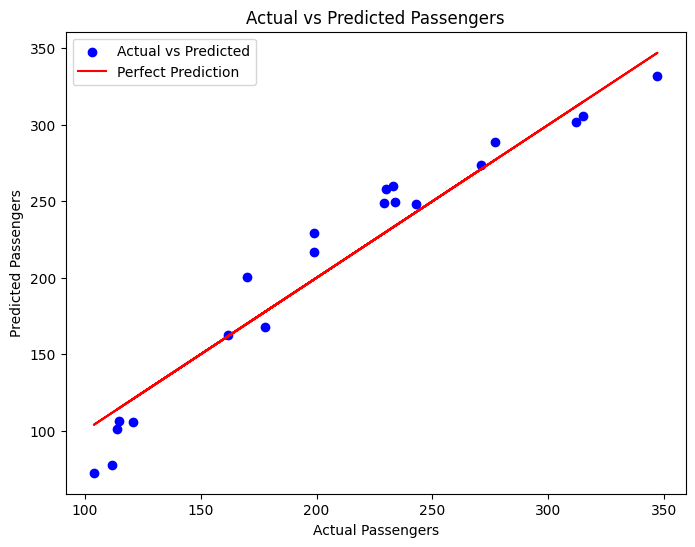

In [9]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')  # Perfect prediction line (y_test = predictions)
plt.title('Actual vs Predicted Passengers')
plt.xlabel('Actual Passengers')
plt.ylabel('Predicted Passengers')
plt.legend()
plt.show()



# Plots

# ACF Plot

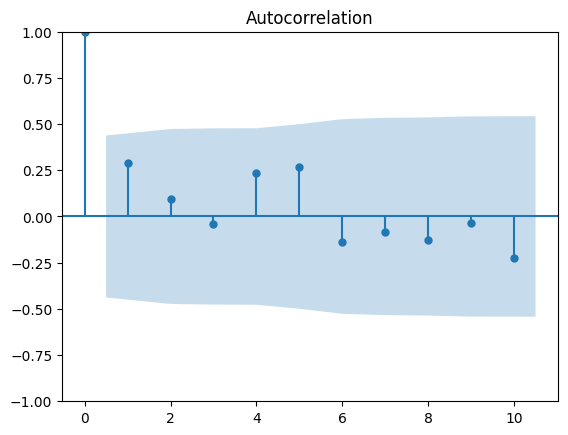

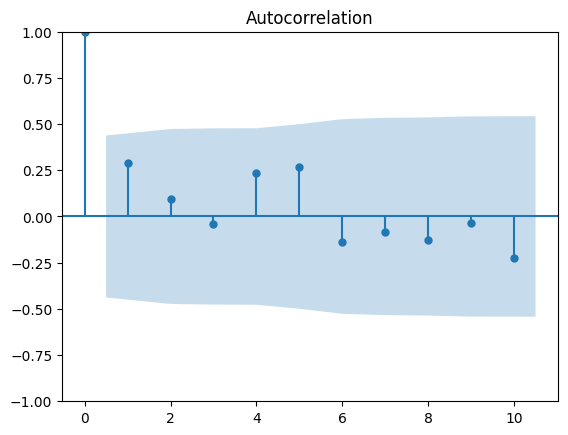

In [10]:

plot_acf(y_test)  # Plot ACF for the target variable

# PACF Plot

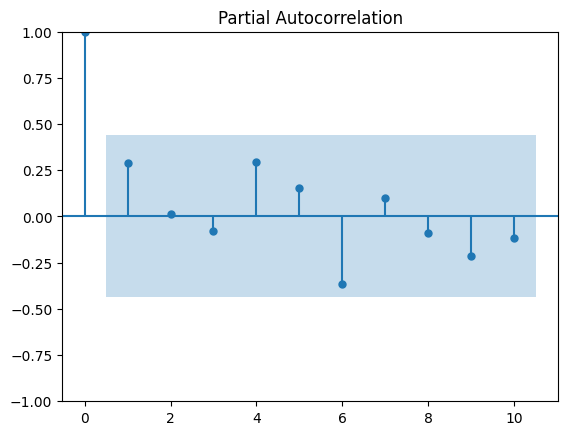

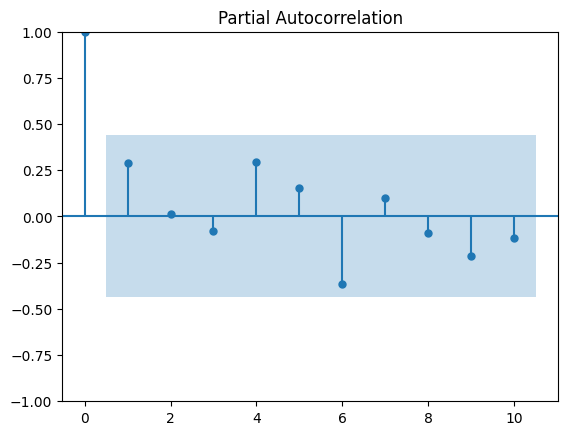

In [11]:
plot_pacf(y_test)  # Plot PACF for the target variable



# Time series decomposition plot

            Passengers
Date                  
1995-01-01         112
1995-02-01         118
1995-03-01         132
1995-04-01         129
1995-05-01         121


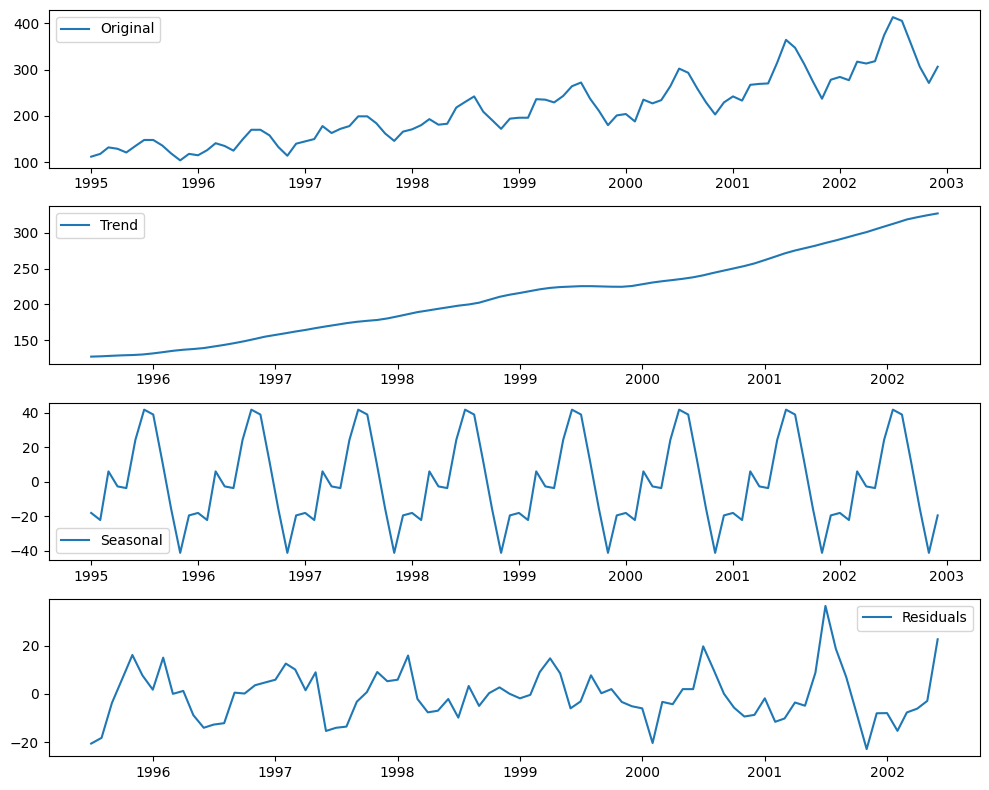

In [12]:

df = airlines_df.copy()

# Convert 'Month' column to datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Extract year and month from the 'Month' column
df['Year'] = df['Month'].dt.year
df['Month'] = df['Month'].dt.month

# Rearrange columns or create a new 'Date' column combining 'Year' and 'Month'
df['Date'] = df.apply(lambda x: pd.to_datetime(f'{x["Year"]}-{x["Month"]:02d}'), axis=1)

df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Set 'Date' as the index and drop unnecessary columns
df.set_index('Date', inplace=True)
df.drop(['Year', 'Month'], axis=1, inplace=True)




# Display the updated DataFrame
print(df.head())

decomposition = seasonal_decompose(df, model='additive')

# Plot the decomposition
plt.figure(figsize=(10, 8))

# Original time series
plt.subplot(411)
plt.plot(df, label='Original')
plt.legend()

# Trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

# Residuals (or Noise) component
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()


# Random Forest Regressor

In [13]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 26.91213090782668


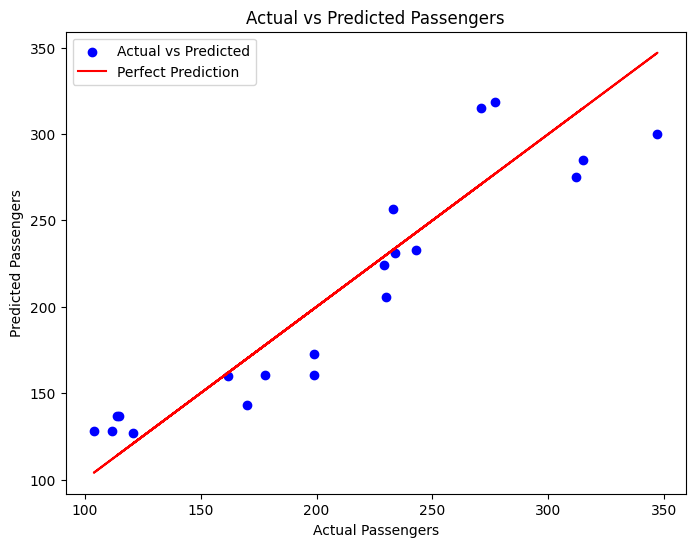

In [14]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')  # Perfect prediction line (y_test = predictions)
plt.title('Actual vs Predicted Passengers')
plt.xlabel('Actual Passengers')
plt.ylabel('Predicted Passengers')
plt.legend()
plt.show()



# LSTM

In [15]:


# Convert X and y to NumPy arrays
X = X.values
y = y.values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Initialize the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error: {rmse}")


Epoch 1/50
3/3 [==============================] - 4s 9ms/step - loss: 51419.0508
Epoch 2/50
3/3 [==============================] - 0s 6ms/step - loss: 51374.4336
Epoch 3/50
3/3 [==============================] - 0s 7ms/step - loss: 51327.0781
Epoch 4/50
3/3 [==============================] - 0s 6ms/step - loss: 51291.2109
Epoch 5/50
3/3 [==============================] - 0s 6ms/step - loss: 51256.9219
Epoch 6/50
3/3 [==============================] - 0s 6ms/step - loss: 51220.7695
Epoch 7/50
3/3 [==============================] - 0s 7ms/step - loss: 51185.2852
Epoch 8/50
3/3 [==============================] - 0s 9ms/step - loss: 51147.3320
Epoch 9/50
3/3 [==============================] - 0s 13ms/step - loss: 51108.5312
Epoch 10/50
3/3 [==============================] - 0s 9ms/step - loss: 51067.5938
Epoch 11/50
3/3 [==============================] - 0s 9ms/step - loss: 51026.1484
Epoch 12/50
3/3 [==============================] - 0s 11ms/step - loss: 50982.0273
Epoch 13/50
3/3 [======

# Arima

In [17]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX



# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.values.reshape(-1, 1))

# Set sequence length and split data into train/test
sequence_length = 4
split = int(len(scaled_data) * 0.8)
train_data = scaled_data[:split]
test_data = scaled_data[split:]

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append((sequence.flatten(), target[0]))
    return sequences

train_sequences = create_sequences(train_data, sequence_length)
test_sequences = create_sequences(test_data, sequence_length)

X_train = np.array([seq[0] for seq in train_sequences])
y_train = np.array([seq[1] for seq in train_sequences])
X_test = np.array([seq[0] for seq in test_sequences])
y_test = np.array([seq[1] for seq in test_sequences])

# ARIMA Model
arima_model = ARIMA(train_data, order=(5,1,0))
arima_model_fit = arima_model.fit()


# Make predictions for ARIMA
arima_predictions = arima_model_fit.forecast(steps=len(X_test))

# Inverse transform predictions
arima_predictions = scaler.inverse_transform(arima_predictions.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE for ARIMA
arima_rmse = np.sqrt(mean_squared_error(y_test, arima_predictions))
print(f"Root Mean Squared Error (RMSE) for ARIMA: {arima_rmse}")


Root Mean Squared Error (RMSE) for ARIMA: 76.32299213178085


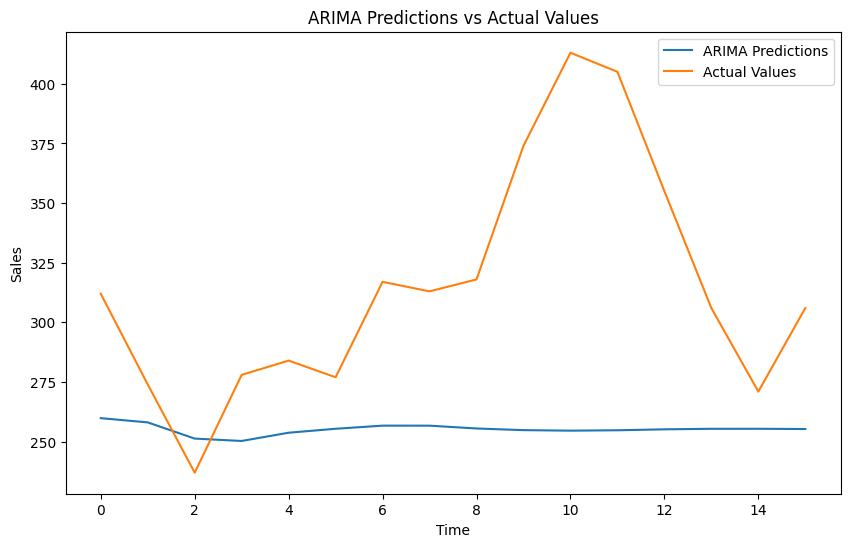

In [18]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(arima_predictions, label='ARIMA Predictions')
plt.plot(y_test, label='Actual Values')
plt.title('ARIMA Predictions vs Actual Values')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


# Sarima

In [19]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX



# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.values.reshape(-1, 1))

# Set sequence length and split data into train/test
sequence_length = 4
split = int(len(scaled_data) * 0.8)
train_data = scaled_data[:split]
test_data = scaled_data[split:]

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append((sequence.flatten(), target[0]))
    return sequences

train_sequences = create_sequences(train_data, sequence_length)
test_sequences = create_sequences(test_data, sequence_length)

X_train = np.array([seq[0] for seq in train_sequences])
y_train = np.array([seq[1] for seq in train_sequences])
X_test = np.array([seq[0] for seq in test_sequences])
y_test = np.array([seq[1] for seq in test_sequences])


sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit()

# Make predictions for ARIMA
sarima_predictions = arima_model_fit.forecast(steps=len(X_test))

# Inverse transform predictions
sarima_predictions = scaler.inverse_transform(sarima_predictions.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE for ARIMA
sarima_rmse = np.sqrt(mean_squared_error(y_test, sarima_predictions))
print(f"Root Mean Squared Error (RMSE) for SARIMA: {arima_rmse}")


Root Mean Squared Error (RMSE) for SARIMA: 76.32299213178085


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


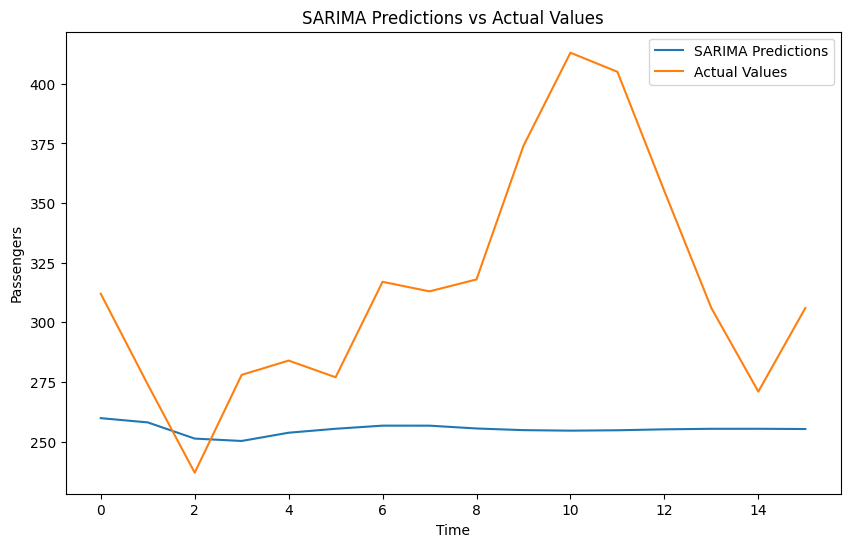

In [20]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(arima_predictions, label='SARIMA Predictions')
plt.plot(y_test, label='Actual Values')
plt.title('SARIMA Predictions vs Actual Values')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()


# Conclusion
#### More complex models, such as tree-based models(like random) or neural networks(like LSTMs), might be prone to overfitting, especially when the dataset is limited like our case. Overfitting occurs when a model learns noise from the training data, making it perform poorly on unseen data.
#### Based on the Airlines data it is clear that Passengers are increasing over years gradually despite of some discrepancies. So a simple linear regression might capture this relationship effectively.
#### ARIMA and SARIMA worked better than LSTMs for this data but not as significant as Random Forest Regressor and Linear Regressor
#### From Graphs which are plotted in this notebook it is clearly visible